**Q2).A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch. Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.**

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving LabTAT.csv to LabTAT.csv


In [ ]:
df=pd.read_csv("LabTAT.csv")
df.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [ ]:
df.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [ ]:
Laboratory_1 = df['Laboratory 1'].mean()
print('Laboratory 1 mean =',Laboratory_1)

Laboratory 1 mean = 178.36158333333336


In [ ]:
Laboratory_1.mean()

178.36158333333336

In [ ]:
Laboratory_2 = df['Laboratory 2'].mean()
print('Laboratory 2 mean =',Laboratory_2)

Laboratory 2 mean = 178.9029166666667


In [ ]:
Laboratory_2.mean()

178.9029166666667

In [ ]:
Laboratory_3 = df['Laboratory 3'].mean()
print('Laboratory 3 mean =',Laboratory_3)

Laboratory 3 mean = 199.91324999999998


In [ ]:
Laboratory_4 = df['Laboratory 4'].mean()
print('Laboratory 4 mean =',Laboratory_4)

Laboratory 4 mean = 163.68275


In [ ]:
print('Laboratory_1 > Laboratory_2 = ',Laboratory_1 > Laboratory_2)
print('Laboratory_2 > Laboratory_3 = ',Laboratory_2 > Laboratory_3)
print('Laboratory_3 > Laboratory_4 = ',Laboratory_3 > Laboratory_4)
print('Laboratory_4 > Laboratory_1 = ',Laboratory_4 > Laboratory_1)

Laboratory_1 > Laboratory_2 =  False
Laboratory_2 > Laboratory_3 =  False
Laboratory_3 > Laboratory_4 =  True
Laboratory_4 > Laboratory_1 =  False


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

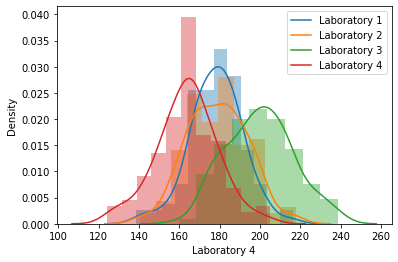

In [ ]:
sns.distplot(df['Laboratory 1'])
sns.distplot(df['Laboratory 2'])
sns.distplot(df['Laboratory 3'])
sns.distplot(df['Laboratory 4'])
plt.legend(['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4'])

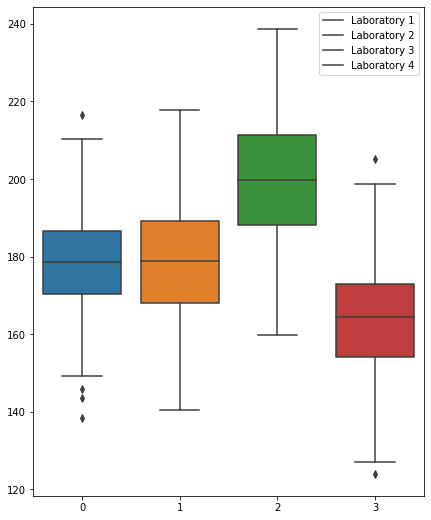

In [ ]:
plt.figure(figsize=(7,9))
sns.boxplot(data=[df['Laboratory 1'],df['Laboratory 2'],df['Laboratory 3'],df['Laboratory 4']])
plt.legend(['Laboratory 1','Laboratory 2','Laboratory 3','Laboratory 4'])


In [ ]:
alpha=0.05
Lab1=pd.DataFrame(df['Laboratory 1'])
Lab2=pd.DataFrame(df['Laboratory 2'])
Lab3=pd.DataFrame(df['Laboratory 3'])
Lab4=pd.DataFrame(df['Laboratory 4'])

In [ ]:
print(Lab1,Lab2,Lab3,Lab4)

     Laboratory 1
0          185.35
1          170.49
2          192.77
3          177.33
4          193.41
..            ...
115        178.49
116        176.08
117        202.48
118        182.40
119        182.09

[120 rows x 1 columns]      Laboratory 2
0          165.53
1          185.91
2          194.92
3          183.00
4          169.57
..            ...
115        170.66
116        183.98
117        174.54
118        197.18
119        215.17

[120 rows x 1 columns]      Laboratory 3
0          176.70
1          198.45
2          201.23
3          199.61
4          204.63
..            ...
115        193.80
116        215.25
117        203.99
118        194.52
119        221.49

[120 rows x 1 columns]      Laboratory 4
0          166.13
1          160.79
2          185.18
3          176.42
4          152.60
..            ...
115        172.68
116        177.64
117        170.27
118        150.87
119        162.21

[120 rows x 1 columns]


In [ ]:
tStat, pvalue = sp.stats.f_oneway(Lab1,Lab2,Lab3,Lab4)

In [ ]:
print("P-Value:{0} T-Statistic:{1}".format(pvalue,tStat))

P-Value:[2.11567089e-57] T-Statistic:[118.70421654]


In [ ]:
if pvalue < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

we reject null hypothesis
